# Example of Text Mining Concepts

## Installing Libraries

* **%pip install nltk** — Installs NLTK (Natural Language Toolkit), a suite of libraries for text processing in Python.
* **%pip install matplotlib** — Installs Matplotlib, a popular library for creating graphs and data visualizations.
* **%pip install wordcloud** — Installs WordCloud, a tool for generating word clouds from text data.
* **%pip install spacy** — Installs spaCy, a powerful library for advanced natural language processing (like POS tagging, dependency parsing, and entity recognition).
* **%pip install networkx** — Installs NetworkX, a library for analyzing and visualizing networks and graphs.
* **%pip install pandas** — Installs pandas, a data manipulation and analysis tool that lets you work with tabular data efficiently.
* **%pip install textblob** — Installs TextBlob, a simplified text processing library for tasks like sentiment analysis and translation.
* **%pip install numpy==1.24.4** — Installs NumPy (with a specified version), a fundamental package for numerical computing in Python.
* **%pip install gensim pyLDAvis** — Installs Gensim (for topic modeling, document similarity, and more) and pyLDAvis (for interactive visualization of topic models).
* **!python3 -m spacy download en\_core\_web\_sm** — Downloads spaCy’s small English language model, which includes word vectors, POS tags, dependency parsing, and more.


In [ ]:
%pip install nltk
%pip install matplotlib
%pip install wordcloud
%pip install spacy
%pip install networkx
%pip install pandas
%pip install textblob
%pip install numpy==1.24.4
%pip install gensim pyLDAvis

!python3 -m spacy download en_core_web_sm 

* **import nltk** — Loads NLTK (Natural Language Toolkit), a suite of libraries for text processing (like tokenization, stemming, and parsing).
* **import string** — Imports the `string` module, which contains helpful constants (like `string.punctuation`) and functions for text manipulation.
* **import matplotlib.pyplot as plt** — Imports `pyplot` from Matplotlib, a tool for creating static, animated, and interactive charts and graphs.
* **import spacy** — Loads spaCy, a powerful library for natural language processing, used for tasks like dependency parsing, POS tagging, and named entity recognition.
* **import pandas as pd** — Imports pandas under a convenient alias `pd`. Pandas is a key library for data manipulation and tabular data structures (like DataFrames).
* **import pyLDAvis** — Imports pyLDAvis, a tool designed for interactive visualization of topic models (generated by LDA).
* **import pyLDAvis.gensim\_models** — Imports Gensim’s adapters for pyLDAvis, allowing you to connect Gensim’s topic models to pyLDAvis for visualization.
* **import networkx as nx** — Imports NetworkX under `nx`. NetworkX lets you create, manipulate, and visualize complex networks or graphs.


In [ ]:
import nltk
import string
import matplotlib.pyplot as plt
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import networkx as nx


* **nltk.download("punkt\_tab")** — Downloads **Punkt’s tab data**, used by NLTK’s sentence tokenizer (Punkt) to split text into sentences and words.
* **nltk.download("stopwords")** — Downloads **common stopwords** for various languages (like “the”, “and”, “is”) that you may want to filter out during text processing.
* **nltk.download("vader\_lexicon")** — Downloads the **VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon**, which is used for performing sentiment analysis — especially for social media-like text — by evaluating words’ positivity or negativity.


In [ ]:
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("vader_lexicon")

* **from nltk import word\_tokenize** — Tokenizes (splits) text into words.
* **from nltk.corpus import stopwords** — Loads a set of words that are considered “stop words” (common words to filter out).
* **from nltk.probability import FreqDist** — Computes frequency distributions of words.
* **from wordcloud import WordCloud** — generates word clouds (visual representation of word frequency).
* **from spacy.pipeline import EntityRuler** — Allows adding custom entity patterns to a spaCy pipeline.
* **from spacy.language import Language** — Serves as a base class for spaCy’s pipeline components.
* **from nltk.sentiment import SentimentIntensityAnalyzer** — Sentiment analysis tool (VADER) for evaluating positivity, negativity, or neutrality in text.
* **from textblob import TextBlob** — Text processing library that includes sentiment analysis, POS tagging, and more.
* **from nltk.tokenize import word\_tokenize, sent\_tokenize** — Tokenize text into words or sentences.
* **from gensim import corpora, models** — Gensim’s modules for topic modeling and semantic analysis.
* **from gensim.models import CoherenceModel** — Measures coherence for topic models.
* **from pathlib import Path** — File path manipulations (working with files and folders).
* **from nltk.util import ngrams** — Generate n-grams (groups of n words).
* **from collections import Counter, defaultdict** —

  * `Counter`: Counts elements in a collection.
  * `defaultdict`: Initializes dictionaries with a fallback factory if a key doesn’t exist.
* **from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder** —

  * `BigramCollocationFinder`: Measures bigrams’ significance in text.
  * `TrigramCollocationFinder`: Measures trigrams’ significance in text.


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from spacy.pipeline import EntityRuler
from spacy.language import Language
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim import corpora, models
from gensim.models import CoherenceModel
from pathlib import Path
from nltk.util import ngrams
from collections import Counter, defaultdict
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

## Defining a `read_book` function

This code defines a function `read_book(title)` that reads the full contents of a text file and returns it as a single cleaned-up string.

Inside the function, the `with open(...)` statement opens the file specified by `title` in read mode with UTF-8 encoding, ensuring it can handle most characters properly. The `read()` method loads the entire file content from the start of the play, using the `start_marker` variable, to the end of the play, using the `end_marker` variable, into the variable `text`.  Line breaks (`\n` and `\r`) are replaced with spaces to flatten the structure. It also uses a regular expression to replace any sequence of multiple whitespace characters with a single space, ensuring consistent spacing. Then, it trims any leading or trailing whitespace and returns the cleaned text, making it ready for further processing like tokenization or analysis.

After defining the function, the line `text = read_book("RomeoAndJuliet.txt")` calls it to load the contents of *Romeo and Juliet*. The following line, `text = text.lower()`, converts the entire text to lowercase. Finally, `print(text)` displays the cleaned, lowercase version of the text.


In [409]:
def read_book(title):
    with open(title, "r", encoding="utf8") as current_file:
        text = current_file.read()
        
    # Find the start position
    start_marker = "1595"
    start_pos = text.find(start_marker)
    
        
    if start_pos == -1:
        print("Start marker not found")
        return ""
        
    # Find the end position
    end_marker = "THE END"
    end_pos = text.find(end_marker, start_pos)
    
    if end_pos == -1:
        print("End marker not found")
        return ""
        
    # Extract the text between markers (including "The end")
    text = text[start_pos:end_pos + len(end_marker)]
    
    # Clean up the text as before
    text = text.replace("\n", " ").replace("\r", " ")
    # Remove multiple consecutive spaces
    import re
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [410]:
# using raw_text to keep the original text intact
raw_text = read_book("RomeoAndJuliet.txt")

In [411]:
print(raw_text)

1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus. Escalus, Prince of Verona. Paris, a young Count, kinsman to the Prince. Montague, heads of two houses at variance with each other. Capulet, heads of two houses at variance with each other. An old Man, of the Capulet family. Romeo, son to Montague. Tybalt, nephew to Lady Capulet. Mercutio, kinsman to the Prince and friend to Romeo. Benvolio, nephew to Montague, and friend to Romeo Tybalt, nephew to Lady Capulet. Friar Laurence, Franciscan. Friar John, Franciscan. Balthasar, servant to Romeo. Abram, servant to Montague. Sampson, servant to Capulet. Gregory, servant to Capulet. Peter, servant to Juliet's nurse. An Apothecary. Three Musicians. An Officer. Lady Montague, wife to Montague. Lady Capulet, wife to Capulet. Juliet, daughter to Capulet. Nurse to Juliet. Citizens of Verona; Gentlemen and Gentlewomen of both houses; Maskers, Torchbearers, Pages, Guards, Watchmen, Servants, and Attendants. SCENE.--

## Using `.replace()` to remove punctuation
This code removes all punctuation marks from the text by replacing them with spaces.

It loops through each character in `string.punctuation`, which contains common punctuation symbols (like `.`, `!`, `?`, `,`, etc.). For every punctuation mark found, `text.replace(x, " ")` replaces it, `x`,  with a space, helping to separate words cleanly without merging them accidentally. After the loop finishes, the text is free of punctuation. The `print()` statements then display a message and the cleaned version of the text, making it ready for further processing like tokenization or frequency analysis.


In [412]:
# traverse the given string and if any punctuation marks occur replace it with null 
text = raw_text
for x in string.punctuation: 
  text = text.replace(x, "") 
# Print string without punctuation 
print("\n AFTER REMOVING PUNCTUATIONS:\n")
print(text)




 AFTER REMOVING PUNCTUATIONS:

1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus Escalus Prince of Verona Paris a young Count kinsman to the Prince Montague heads of two houses at variance with each other Capulet heads of two houses at variance with each other An old Man of the Capulet family Romeo son to Montague Tybalt nephew to Lady Capulet Mercutio kinsman to the Prince and friend to Romeo Benvolio nephew to Montague and friend to Romeo Tybalt nephew to Lady Capulet Friar Laurence Franciscan Friar John Franciscan Balthasar servant to Romeo Abram servant to Montague Sampson servant to Capulet Gregory servant to Capulet Peter servant to Juliets nurse An Apothecary Three Musicians An Officer Lady Montague wife to Montague Lady Capulet wife to Capulet Juliet daughter to Capulet Nurse to Juliet Citizens of Verona Gentlemen and Gentlewomen of both houses Maskers Torchbearers Pages Guards Watchmen Servants and Attendants SCENEVerona Mantua THE PROLOGUE 

## Using `.lower()` to make text uniform
This code is using `.lower()` to convert all characters in the text to lowercase, which is a common step in text preprocessing to ensure consistency (so that words like "This" and "this" are treated the same). Similarly, the `.upper()` method converts all characters to uppercase. Finally, `print(text)` outputs the lowercase version of the text.


In [413]:
#sample text
sample_text = "This is my test text. We're keeping this text short to keep things manageable."
sample_text = sample_text.lower() 
print(sample_text)

this is my test text. we're keeping this text short to keep things manageable.


In [414]:
text = text.lower()
print(text)

1595 the tragedy of romeo and juliet by william shakespeare dramatis personae chorus escalus prince of verona paris a young count kinsman to the prince montague heads of two houses at variance with each other capulet heads of two houses at variance with each other an old man of the capulet family romeo son to montague tybalt nephew to lady capulet mercutio kinsman to the prince and friend to romeo benvolio nephew to montague and friend to romeo tybalt nephew to lady capulet friar laurence franciscan friar john franciscan balthasar servant to romeo abram servant to montague sampson servant to capulet gregory servant to capulet peter servant to juliets nurse an apothecary three musicians an officer lady montague wife to montague lady capulet wife to capulet juliet daughter to capulet nurse to juliet citizens of verona gentlemen and gentlewomen of both houses maskers torchbearers pages guards watchmen servants and attendants sceneverona mantua the prologue enter chorus chor two households

## Using `len()`
We can use `print(len(text))` to print the **number of characters** in the string `text `, including letters, spaces, and any remaining symbols.
For example, if `text = "hello world"`, `len(text)` returns `11` (5 letters + 1 space + 5 letters).
This is useful for checking the length of the entire string, but it doesn’t tell you how many words there are.

We can also use `print(len(text.split()))` to print the **number of words** in the string `text`. `text.split()` breaks the string into a list of words using whitespace (spaces, tabs, line breaks) as the default separator.
For example, if `text = "hello world"`, then `text.split()` returns `["hello", "world"]`, and `len(text.split())` returns `2`.
This is commonly used in text analysis to count how many words are in a document or sentence.

In [415]:
# Count the number of characters after removing punctuations
print(len(text))

# Count the number of words after removing punctuations
print(len(text.split()))

129616
25789


## Tokenizing
This line of code breaks the input text into individual tokens, which are typically words and punctuation marks. First, the text is converted to lowercase using `text.lower()` to ensure consistency in analysis. Then, the `word_tokenize()` function from NLTK is used to intelligently split the text into a list of tokens, accounting for punctuation, contractions, and special characters. The resulting tokens are stored in the variable `token`, making them ready for further processing such as frequency analysis or filtering.

In [416]:
# BREAK THE STRING INTO TOKENS
token = word_tokenize(text.lower())

## Using `stopwords` to remove stop words
This code removes common stopwords from the list of tokens in the text. Then, it uses a list comprehension to create a new list `no_stopwords` containing only the tokens that are **not** in the stopwords set. Finally, it prints the cleaned list of tokens, which now excludes common words like "the", "is", and "and"—helping to focus analysis on more meaningful content.

For more on using stopwords check out [Creating a Stopwords List](../creating-stopwords-list.ipynb)

In [417]:
# Get all the speaker names from your text to remove who is speaking from analysis
speaker_names = {"ben", "rom", "ty", "prince", "cap", "wife", "mon", "par", 
                "serv", "nurse", "jul", "mer", "officer", "citizens", "greg", "samp",
                "abr", "m wife", "chor", "mer"}

# Combine with other stopwords specific to the text
custom_words = {"thou", "thy", "thee", "tis", "twas", "hath", "doth", "ye", "o", 
                "art", "hast", "shalt", "shall", "unto", "wherefore", "ere", "hence", "sir",
                "madam", "enter", "exit", "exeunt", "scene", "upon", "one", "come", "make",
                "well", "yet", "may", "say", "give", "take", "would", "one" "go", "tell", "ill"}

stopwords_set = set(stopwords.words("english"))
stopwords_set.update(custom_words)
stopwords_set.update(speaker_names)


no_stopwords = [x for x in token if x not in stopwords_set] # for each x in text1, if x is not in a then, add it to the list" 
print("After removing the stop words:\n", no_stopwords)


After removing the stop words:
 ['1595', 'tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'verona', 'paris', 'young', 'count', 'kinsman', 'montague', 'heads', 'two', 'houses', 'variance', 'capulet', 'heads', 'two', 'houses', 'variance', 'old', 'man', 'capulet', 'family', 'romeo', 'son', 'montague', 'tybalt', 'nephew', 'lady', 'capulet', 'mercutio', 'kinsman', 'friend', 'romeo', 'benvolio', 'nephew', 'montague', 'friend', 'romeo', 'tybalt', 'nephew', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'romeo', 'abram', 'servant', 'montague', 'sampson', 'servant', 'capulet', 'gregory', 'servant', 'capulet', 'peter', 'servant', 'juliets', 'apothecary', 'three', 'musicians', 'lady', 'montague', 'montague', 'lady', 'capulet', 'capulet', 'juliet', 'daughter', 'capulet', 'juliet', 'verona', 'gentlemen', 'gentlewomen', 'houses', 'maskers', 'torchbearers', 'pages', 'guards', 'watchmen', 

The line `len(no_stopwords)` returns the **number of tokens remaining after stopwords have been removed** from the original text.

This is useful for understanding how much of the text consists of meaningful or content-rich words (i.e., words that aren't basic connectors like *"and"*, *"the"*, or *"is"*). The result gives you a clearer sense of the size of your cleaned, analysis-ready dataset.

In [418]:
len(no_stopwords)

11441

## Using `FreqDist` to Get Frequencies
This code calculates and displays the frequency of the most common words in the cleaned text. First, it creates a `FreqDist` object from the `no_stopwords` list, which counts how often each token appears. Then, `fdist.most_common(5)` returns the top 5 most frequent words along with their counts, and this result is stored in `fdist1`. After printing the top words, the code separates this list of word-frequency pairs into two separate lists: `x` holds the words and `y` holds their corresponding frequencies. This separation is useful for plotting or further analysis.


In [419]:
# find the frequency of tokens
fdist = FreqDist(no_stopwords) 

# Find the top 5 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('romeo', 137), ('love', 137), ('friar', 92), ('good', 82), ('go', 76)]
['romeo', 'love', 'friar', 'good', 'go']
[137, 137, 92, 82, 76]


The line `plt.bar(x, y)` creates a **bar chart** using the two lists:

* `x` contains the **words** (labels for the x-axis), and
* `y` contains the **frequencies** (heights of the bars on the y-axis).

This visualizes the top 5 most common words (after removing stopwords) and shows how frequently each one appears in the text. It's a helpful way to quickly identify which meaningful words are most prominent.


<BarContainer object of 5 artists>

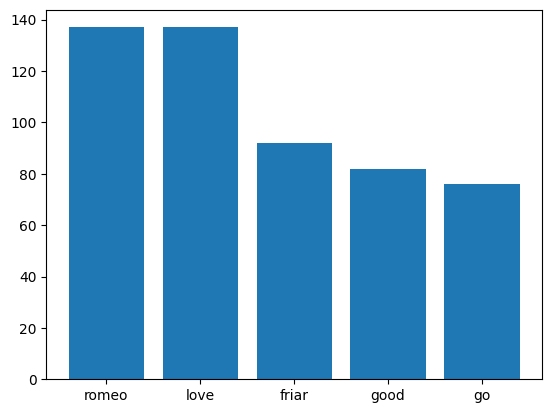

In [420]:
plt.bar(x,y)
 

This code calculates the frequency of all tokens in the text, including common stopwords and punctuation.

First, it uses `FreqDist(token)` to create a frequency distribution object that counts how many times each token appears. Then, `fdist.most_common(5)` retrieves the top 5 most frequent tokens along with their counts, and prints them. Next, it separates this list of (word, frequency) pairs into two separate lists: `x` contains the top 10 words, and `y` contains their corresponding frequencies. These lists can then be used to plot a bar graph or perform other forms of analysis.

In [421]:
# find the frequency of tokens
fdist = FreqDist(token) 

# Find the top 10 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('and', 713), ('the', 680), ('i', 585), ('to', 541), ('a', 468)]
['and', 'the', 'i', 'to', 'a']
[713, 680, 585, 541, 468]


We can use `plt.bar(x, y)` to draw the bars, where `x` contains the words and `y` their corresponding frequencies. Then, the plot is labeled with `xlabel`, `ylabel`, and `title` to give it context. Instead of just displaying the graph on the screen, `plt.savefig("plot.png")` saves the figure as an image file named **plot.png** in the current directory. This is useful if you want to include the graph in a report or presentation.


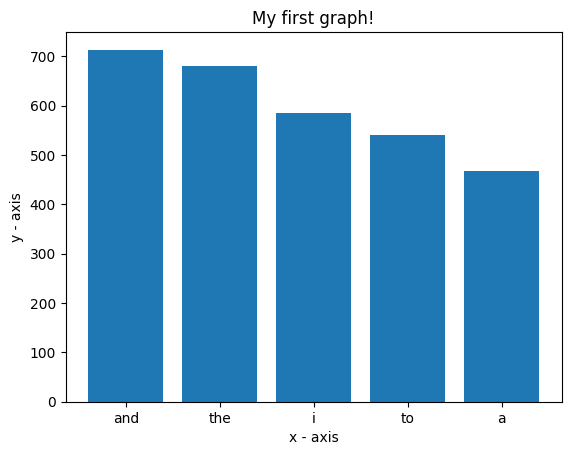

In [422]:
# plotting the points  
plt.bar(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.savefig("plot.png")

This code generates and displays a **word cloud** from the list of meaningful tokens stored in `no_stopwords`.

It starts by importing `WordCloud` and other useful tools from the `wordcloud` library. A figure is created using `plt.figure()` with a size of 12x12 inches. The word cloud is then generated with specified dimensions (`width=1800`, `height=1400`) by converting the list of tokens (`no_stopwords`) into a single string using `str(no_stopwords)`. The `plt.imshow()` function displays the word cloud image, and `plt.axis("off")` removes the axis for a cleaner look. Finally, `plt.show()` renders the visual, where the size of each word reflects its frequency in the text.


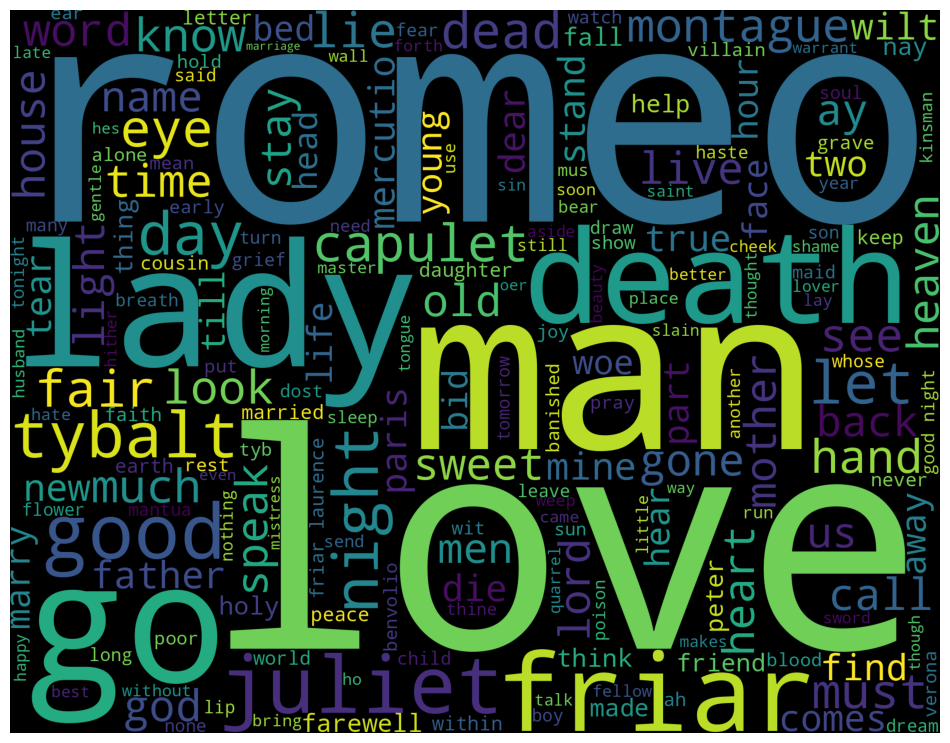

In [423]:
width = 12
height = 12
plt.figure(figsize=(width, height))
if isinstance(no_stopwords, list):
    text_for_wordcloud = ' '.join(no_stopwords)
else:
    text_for_wordcloud = str(no_stopwords)
wordcloud = WordCloud(width=1800,height=1400).generate(str(text_for_wordcloud))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Using NER concepts

For more information refer to [Named Entity Recognition](../MultiLingualNer.md)

This code customizes the SpaCy **Named Entity Recognition (NER)** pipeline specifically for analyzing Shakespeare’s Romeo and Juliet text. It starts by loading the standard English model `(en_core_web_sm)` and then adds an EntityRuler before the default NER, which lets you define exact match patterns for named entities.

In [424]:
# Load model
nlp = spacy.load("en_core_web_sm")

# Create EntityRuler via pipeline
ruler = nlp.add_pipe("entity_ruler", before="ner")

A list of key character names is created, each assigned the label "PERSON". It also adds geographic locations like `verona` and `mantua` labeled as `GPE` (Geopolitical Entities). To reduce noise and false positives, a list of common short or misleading terms that might be misclassified as persons is added with the label `IGNORE`.

In [425]:
# Define character names from the play
character_names = [
    "escalus", "paris", "montague", "capulet", "romeo", "tybalt",
    "mercutio", "benvolio", "friar laurence", "friar john", "balthasar",
    "abram", "sampson", "gregory", "peter", "lady montague", "lady capulet",
    "juliet", "nurse", "apothecary", "officer", "three musicians"
]

patterns = [{"label": "PERSON", "pattern": name} for name in character_names]

# Add patterns for locations and places
patterns.append({"label": "GPE", "pattern": "verona"})
patterns.append({"label": "GPE", "pattern": "mantua"})


# Terms to ignore/misclassified as PERSON
ignore_terms = ["ben", "rom", "ty", "prince", "cap", "wife", "mon", "par", 
                "serv", "nurse", "jul", "mer", "officer", "citizens", "greg", "samp", 
                "abr", "m wife", "chor", "mer", "moon", "potpan", "dun", "nay", "sin",
                "anon", "heareth", "lover", "mar", "farewell", "villain am", "gallop apace",
                "heartsick groans", "this.-", "yon grey", "proud'-", "henceforward", "on't", 
                "thou", "thy", "thee", "tis", "twas", "hath", "doth", "ye", "o", "come-",
                "art", "hast", "shalt", "unto", "wherefore", "ere", "hence", "sir",
                "madam", "enter", "exit", "exeunt", "scene", "pois'd", "bliss",

]

# Add IGNORE patterns
for term in ignore_terms:
    patterns.append({"label": "IGNORE", "pattern": term})

ruler.add_patterns(patterns)

The custom pipeline component `clean_ents` is registered to filter the recognized entities, keeping only `PERSON`, `GPE`, and `LOC` labels, while discarding unwanted or ambiguous ones, especially those in the ignore_terms list or too short and lowercase (likely not valid names). Then, this cleanup component is added to the pipeline.

In [426]:
# 🔧 Register custom cleanup pipe
@Language.component("clean_ents")
def clean_ents(doc):
    allowed_labels = {"PERSON", "GPE", "LOC"}  # Only keep these
    filtered_ents = []
    for ent in doc.ents:
        if ent.label_ not in allowed_labels:
            continue
        if ent.label_ == "PERSON":
            if ent.text.lower() in ignore_terms:
                continue
            if len(ent.text) <= 2 and ent.text.islower():
                continue
        elif ent.label_ == "IGNORE":
            continue
        filtered_ents.append(ent)
    doc.ents = filtered_ents
    return doc

# Add cleanup to pipeline
nlp.add_pipe("clean_ents", last=True)

<function __main__.clean_ents(doc)>

The text is processed through this enhanced NLP pipeline, and the filtered entities (character names, places) are printed out. This setup improves entity recognition accuracy tailored to the play’s specific vocabulary and characters.

In [427]:
# Process the text
doc = nlp(raw_text.lower())

for ent in doc.ents:
    print(ent.text, ent.label_)

romeo PERSON
juliet PERSON
william shakespeare PERSON
escalus PERSON
verona GPE
paris PERSON
kinsman PERSON
montague PERSON
capulet PERSON
capulet PERSON
romeo PERSON
montague PERSON
tybalt PERSON
lady capulet PERSON
mercutio PERSON
kinsman PERSON
romeo PERSON
benvolio PERSON
montague PERSON
romeo PERSON
tybalt PERSON
lady capulet PERSON
friar laurence PERSON
friar john PERSON
balthasar PERSON
romeo PERSON
abram PERSON
montague PERSON
sampson PERSON
capulet PERSON
gregory PERSON
capulet PERSON
peter PERSON
juliet PERSON
apothecary PERSON
three musicians PERSON
lady montague PERSON
montague PERSON
lady capulet PERSON
capulet PERSON
juliet PERSON
capulet PERSON
juliet PERSON
verona GPE
mantua GPE
verona GPE
verona GPE
sampson PERSON
gregory PERSON
capulet PERSON
gregory PERSON
montague PERSON
montague PERSON
montague PERSON
abram PERSON
balthasar PERSON
gregory PERSON
sampson PERSON
benvolio PERSON
sampson PERSON
gregory PERSON
part PERSON
tybalt PERSON
benvolio PERSON
capulet PERSON
mon

## Sentiment Analysis

This code performs **sentence-level sentiment analysis** using NLTK's `SentimentIntensityAnalyzer`. It starts by initializing the analyzer, then splits the input `text` into individual sentences with `nltk.sent_tokenize(text)`. Each sentence is passed to `polarity_scores()`, which returns sentiment metrics: compound (overall sentiment score), and the proportions of positive, negative, and neutral sentiment. These results are stored in a list of dictionaries, with each dictionary representing a sentence and its corresponding sentiment scores. The script then prints some of sentences analyzed and iteratively displays the sentiment scores for each one, showing the beginning of each sentence for readability if it’s longer than 50 characters.

In [428]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of sentences
sentences = nltk.sent_tokenize(raw_text.lower())
sentiment_scores = []

for sentence in sentences:
    scores = sia.polarity_scores(sentence)
    sentiment_scores.append({
        'sentence': sentence[:50] + '...' if len(sentence) > 50 else sentence,
        'compound': scores['compound'],
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu']
    })

print(f"Analyzed {len(sentiment_scores)} sentences")
print("Sample sentiment scores:")

sample_indices = [0, 1, 2, len(sentiment_scores)//2, len(sentiment_scores)-3, len(sentiment_scores)-2, len(sentiment_scores)-1]
for i in sample_indices:
    print(f"  Sentence {i+1}: {sentiment_scores[i]}")


Analyzed 3294 sentences
Sample sentiment scores:
  Sentence 1: {'sentence': '1595 the tragedy of romeo and juliet by william sh...', 'compound': -0.6597, 'positive': 0.0, 'negative': 0.268, 'neutral': 0.732}
  Sentence 2: {'sentence': 'escalus, prince of verona.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3: {'sentence': 'paris, a young count, kinsman to the prince.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 1648: {'sentence': 'come, sir, your passado!', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3292: {'sentence': 'go hence, to have more talk of these sad things; s...', 'compound': -0.8479, 'positive': 0.0, 'negative': 0.247, 'neutral': 0.753}
  Sentence 3293: {'sentence': 'exeunt omnes.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3294: {'sentence': 'the end', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}


This code combines two sentiment analysis approaches—**VADER** and **TextBlob**—to provide both detailed and overall sentiment insights. First, it creates a **Pandas DataFrame** (`sentiment_df`) from the previously generated list of sentiment scores, making it easier to analyze or visualize the results. Then, it uses `TextBlob` to calculate the **overall polarity** and **subjectivity** of the entire text. Polarity ranges from -1 to 1 (negative to positive sentiment), while subjectivity ranges from 0 to 1 (objective to subjective language). The results are printed with brief explanations to help interpret the sentiment values.

In [429]:
# Create sentiment dataframe for analysis
sentiment_df = pd.DataFrame(sentiment_scores)

# Overall sentiment using TextBlob
blob = TextBlob(text)
overall_polarity = blob.sentiment.polarity
overall_subjectivity = blob.sentiment.subjectivity

print(f"Overall Sentiment (TextBlob):")
print(f"  Polarity: {overall_polarity:.3f} (-1=negative, 1=positive)")
print(f"  Subjectivity: {overall_subjectivity:.3f} (0=objective, 1=subjective)")

Overall Sentiment (TextBlob):
  Polarity: 0.123 (-1=negative, 1=positive)
  Subjectivity: 0.554 (0=objective, 1=subjective)


## Topic Modeling

The code processes a large text by first breaking it into smaller chunks and then cleaning each chunk for analysis. The `chunk_text` function splits the `raw_text` into groups of sentences, where each chunk contains a specified number (default 5) of consecutive sentences combined into one string. The `process_chunks` function takes these chunks and processes each one by converting the text to lowercase, tokenizing it into words, removing any tokens that are not purely alphabetic, and filtering out stopwords using the predefined `stopwords_set`. It only keeps chunks that contain at least three valid words. Finally, the code applies both functions sequentially: it chunks the text into groups of 8 sentences, then processes these chunks into cleaned token lists. The output prints the number of resulting processed chunks and shows a sample of the first two.

This approach creates meaningful document-sized units for topic modeling creating a more accurate analysis than using `sent_tokenize`.


In [430]:
text = raw_text
# Step 1: Chunk the raw text into groups of sentences
def chunk_text(text, chunk_size=5):
    """Split raw text into chunks of N sentences."""
    sentences = sent_tokenize(text)
    return [' '.join(sentences[i:i+chunk_size]) for i in range(0, len(sentences), chunk_size)]

# Step 2: Preprocess each chunk
def process_chunks(chunks):
    processed = []

    for chunk in chunks:
        tokens = word_tokenize(chunk.lower())
        words = [word for word in tokens if word.isalpha() and word not in stopwords_set]
        if len(words) >= 3:
            processed.append(words)

    return processed

# Step 3: Apply both functions
chunks = chunk_text(text, chunk_size=8)
documents = process_chunks(chunks)

print(f"Number of documents (chunks): {len(documents)}")
print(documents[:2])

Number of documents (chunks): 416
[['tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'verona', 'paris', 'young', 'count', 'kinsman', 'montague', 'heads', 'two', 'houses', 'variance', 'capulet', 'heads', 'two', 'houses', 'variance', 'old', 'man', 'capulet', 'family', 'romeo', 'son', 'montague', 'tybalt', 'nephew', 'lady', 'capulet'], ['mercutio', 'kinsman', 'friend', 'romeo', 'benvolio', 'nephew', 'montague', 'friend', 'romeo', 'tybalt', 'nephew', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'romeo', 'abram', 'servant', 'montague', 'sampson', 'servant', 'capulet', 'gregory', 'servant', 'capulet']]


This code builds a dictionary from the tokenized documents, which maps each unique word to a unique integer ID. Then, it filters out words that appear in fewer than 5 documents, `no_below=5`, or in more than 90% of the documents, `no_above=0.9`, removing rare and overly common words to improve model quality. Finally, it converts each document into a bag-of-words, `BoW`, representation, where each document is represented as a list of tuples with word IDs and their frequencies in that document. This `corpus` is ready for use with models like LDA for topic extraction.

In [431]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(documents)
dictionary.filter_extremes(no_below=5, no_above=0.9)

bow_corpus = [dictionary.doc2bow(doc) for doc in documents]


This code trains a `Latent Dirichlet Allocation (LDA)` topic model on the prepared corpus. `num_topics=6` specifies that the model should find 6 distinct topics within the documents. `passes=15` means the model will iterate 15 times over the entire corpus during training to improve topic estimation. The `LdaModel` is created by passing the `bag-of-words` corpus, the dictionary (mapping word IDs to words), the number of topics, and the number of passes. The resulting `lda_model` can then be used to explore the underlying thematic structure in the text data.

In [432]:
# Train LDA model
num_topics = 6
passes = 15

lda_model = models.LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=passes
)


This code evaluates the quality of your `LDA topic model` using the `c_v` coherence measure, which is based on a sliding window, a one-set segmentation of the top words, and an indirect confirmation measure that combines cosine similarity and `normalized pointwise mutual information (NPMI)`. The c_v measure generally correlates well with human judgment of topic coherence and usually returns a score between **0 and 1**, where higher values indicate more coherent and meaningful topics.

Other common coherence measures include `u_mass`, which relies on document co-occurrence counts from the original corpus and can sometimes produce negative scores; `c_npmi (normalized PMI)`, which uses external corpus statistics and is considered more robust for semantic coherence; and `c_uci`, which is based on unnormalized PMI of word pairs and is less commonly used but helpful for exploratory analysis. By printing the coherence score, you get a quantitative way to assess how well your topics capture semantically related words from your dataset across different evaluation methods.

In [433]:
# Evaluate model coherence
coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')


Coherence Score: 0.2697


This code prints the top words for each topic in your LDA model. For each topic index from 0 to `num_topics - 1`, it retrieves the most significant words using `lda_model.show_topic(i)`. It then joins these words into a single string and prints them with the corresponding topic number. This helps you interpret and understand what each topic represents based on its most prominent words.

In [434]:
# Print the top words per topic
for i in range(num_topics):
    words = lda_model.show_topic(i)
    topic_words = " ".join([word for word, _ in words])
    print(f"Topic {i}: {topic_words}")


Topic 0: good romeo mine peter go us lady know let night
Topic 1: romeo love tybalt capulet night montague old mercutio man name
Topic 2: night love sweet god good day farewell romeo much heaven
Topic 3: lady day speak juliet dead friar good go death time
Topic 4: friar death man lady see juliet lord bid love go
Topic 5: fair romeo therefore must nay watch love good let man


This code creates an interactive visualization of your LDA topic model using **pyLDAvis**. First, it enables the notebook mode so the visualization can be displayed inline if you're running this in a Jupyter notebook. Then, it prepares the visualization by linking the trained `lda_model` with the bag-of-words corpus and the dictionary. The `pyLDAvis.display(vis)` function shows an interactive plot where you can explore the topics, their prevalence, and the most relevant terms. Finally, the visualization is saved as an HTML file (`romeo_and_juliet_lda.html`), allowing you to open and share the interactive graph outside the notebook environment.

In [435]:
# Create interactive pyLDAvis visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

# Save visualization to HTML
pyLDAvis.save_html(vis, 'romeo_and_juliet_lda.html')


## Bigram and Trigram Analysis

The `analyze_ngrams` function takes a text and an optional `n` value (defaulting to 2 for bigrams) and returns the frequency of each n-gram in the text after stopword removal.`ngrams(no_stopwords, n)`, uses the globally available list `no_stopwords` to generate n-grams. `list(...)`, converts the generator to a list of n-grams (tuples of `n` words). `Counter(...)`, counts how often each n-gram appears. The function then returns a `Counter` dictionary-like object where keys are n-grams and values are their frequencies.


In [436]:
def analyze_ngrams(text, n=2):
     
    # Generate n-grams
    ngrams_list = list(ngrams(no_stopwords, n))
    ngram_freq = Counter(ngrams_list)
    
    return ngram_freq

The `visualize_ngrams` function creates a side-by-side horizontal bar chart to display the top 15 most frequent bigrams and trigrams from a given text. The `bigram_freq` input variable is a `Counter` object with bigram frequencies. The `trigram_freq` input variable is a `Counter` object with trigram frequencies.

Then this function creates a bar chart with: 1-row, 2-column subplot for side-by-side bar charts. It shows the top 15 bigrams and trigrams by converting tuple n-grams into string labels using `' '.join(...)`. Then it plots horizontal bar charts with `barh()` showing the most common phrases.


In [437]:
def visualize_ngrams(bigram_freq, trigram_freq):   
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bigrams
    top_bigrams = dict(bigram_freq.most_common(15))
    bigram_labels = [' '.join(bg) for bg in top_bigrams.keys()]
    
    axes[0].barh(bigram_labels, list(top_bigrams.values()))
    axes[0].set_title('Top 15 Bigrams')
    axes[0].set_xlabel('Frequency')
    
    # Trigrams
    top_trigrams = dict(trigram_freq.most_common(15))
    trigram_labels = [' '.join(tg) for tg in top_trigrams.keys()]
    
    axes[1].barh(trigram_labels, list(top_trigrams.values()))
    axes[1].set_title('Top 15 Trigrams')
    axes[1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()



This code extracts all `bigrams` (2-word combinations) and then `trigrams` (3-word combinations) from the `no_stopwords` token list and counts their frequency.

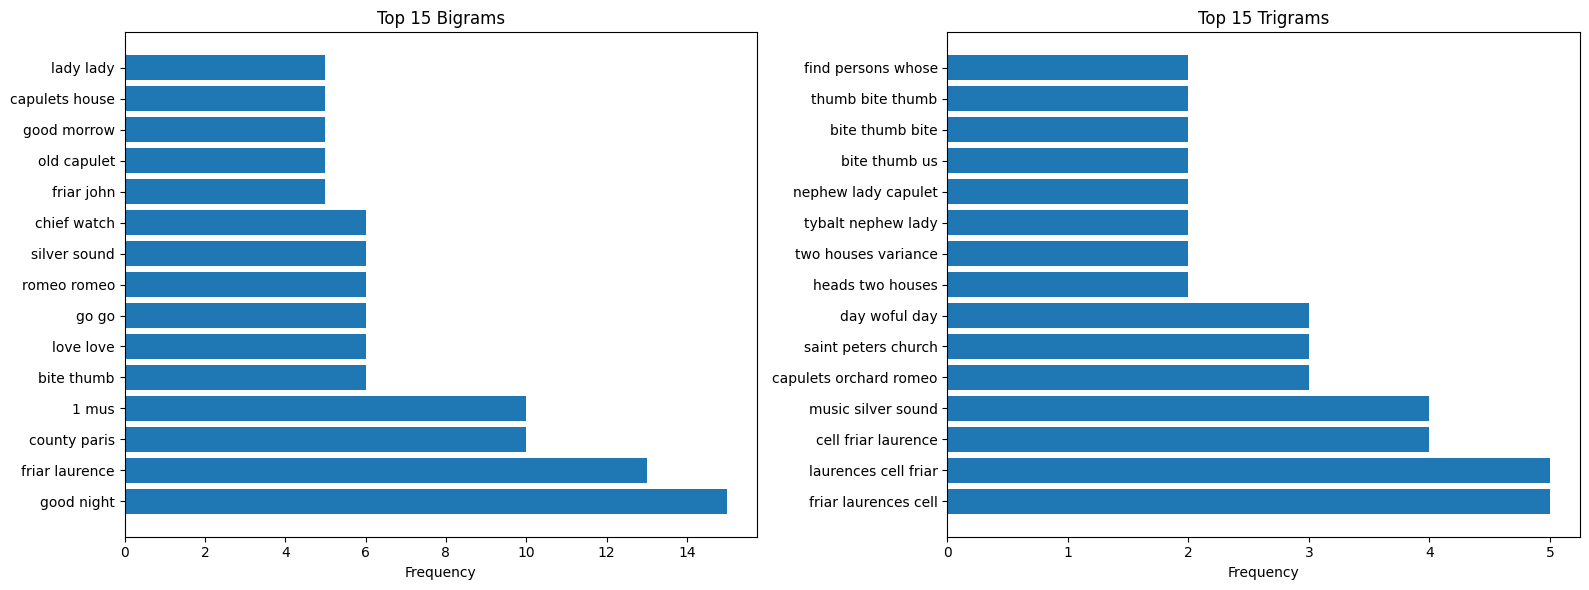

In [438]:
# Usage
bigram_freq = analyze_ngrams(text, n=2)
trigram_freq = analyze_ngrams(text, n=3)
visualize_ngrams(bigram_freq, trigram_freq)

## Concordance and Collocation

For more information please refer to [Concordance and Collocation](../concordance.ipynb)

### Concordance


In [439]:
# Use token variable from above for word tokenization version of raw_text
# Create an NLTK Text object
con_text = nltk.Text(token)

This code uses `.concordance` to output all occurrences of the word `love` in the text, showing the word in its immediate context (a few words before and after). This helps understand how `love` is used in different parts of the text — useful for analyzing themes, tone, or character relationships (especially in a play like Romeo and Juliet). The search is **case-sensitive**, so make sure `love` matches the casing in your token list. `love` can be changed to other words like `death`, `juliet`, or `romeo` to explore more. By default, the first 25 matches are printed along with 80 charactes on each side. This can be changed by sending `lines` and `width` attributes with your given word.

In [440]:
# Create a concordance for the given word
con_text.concordance('love')

Displaying 25 of 137 matches:
 fearful passage of their deathmarkd love and the continuance of their parents
which having makes them short ben in love rom out ben of love rom out of her f
hem short ben in love rom out ben of love rom out of her favour where i am in 
 rom out of her favour where i am in love ben alas that love so gentle in his 
our where i am in love ben alas that love so gentle in his view should be so t
ous and rough in proof rom alas that love whose view is muffled still should w
s much to do with hate but more with love why then o brawling love o loving ha
t more with love why then o brawling love o loving hate o anything of nothing 
ng sleep that is not what it is this love feel i that feel no love in this dos
 it is this love feel i that feel no love in this dost thou not laugh ben no c
ave it prest with more of thine this love that thou hast shown doth add more g
d more grief to too much of mine own love is a smoke raisd with the fume of si
n tell me in sadness w

`.concordance` can accept a bigram, trigram, or longer construction, they are supplied as individual strings within a Python list. (If you try to supply a string with a space in the middle, there will be no results.)

In [441]:
# Create a concordance for a sequence of words
con_text.concordance(['romeo', 'juliet'])

Displaying 1 of 1 matches:
hat word is father mother tybalt romeo juliet all slain all dead romeo is bani


### Collocation


This code initializes objects that provide statistical association measures for evaluating how strongly two (bigram) or three (trigram) words are associated with each other in a corpus.

In [442]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

This code snippet identifies the top 10 bigram collocations in your tokenized text using **Pointwise Mutual Information (PMI)**, a statistical measure of association between two words. It first wraps your list of word tokens (`token`) in an `nltk.Text` object to enable advanced NLP methods like concordances and collocations. Next, it initializes a `BigramCollocationFinder`, which scans through the text to find all word pairs (bigrams) and filters out all bigrams that occur fewer than 3 times in your text. Then, it uses **PMI** to rank how strongly word pairs are associated and returns the top **10 highest-scoring bigrams**.

In [443]:
collocation_text = nltk.Text(token)
finder = BigramCollocationFinder.from_words(collocation_text)
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('saint', 'peters'),
 ('princes', 'doom'),
 ('peters', 'church'),
 ('thousand', 'times'),
 ('hearts', 'ease'),
 ('laurences', 'cell'),
 ('1', 'mus'),
 ('silver', 'sound'),
 ('chief', 'watch'),
 ('capulets', 'orchard')]

This code is identifying the **top 25 trigram collocations** using **PMI (Pointwise Mutual Information)** after applying a frequency filter. First, it initializes a trigram finder using your list of tokens (`collocation_text`). Then, it looks for all 3-word combinations (`trigrams`). It removes trigrams that appear fewer than **3 times**, this helps eliminate statistically unreliable or noisy phrases. Finally, it returns the **25 trigrams with the highest PMI scores**. **PMI** emphasizes strong, non-random associations between words.

In [444]:
finder = TrigramCollocationFinder.from_words(collocation_text)
finder.apply_freq_filter(3)
#finder.apply_word_filter(lambda w: w in ('I', 'me')) Remove particular words with a lambda function
finder.nbest(trigram_measures.pmi, 25)

[('saint', 'peters', 'church'),
 ('scene', 'v', 'capulets'),
 ('scene', 'ii', 'capulets'),
 ('exeunt', 'scene', 'ii'),
 ('exeunt', 'scene', 'v'),
 ('laurences', 'cell', 'enter'),
 ('exeunt', 'scene', 'iv'),
 ('friar', 'laurences', 'cell'),
 ('exeunt', 'scene', 'iii'),
 ('whose', 'names', 'are'),
 ('capulets', 'orchard', 'enter'),
 ('plague', 'o', 'both'),
 ('bite', 'my', 'thumb'),
 ('her', 'silver', 'sound'),
 ('both', 'your', 'houses'),
 ('farewell', 'exeunt', 'scene'),
 ('the', 'princes', 'doom'),
 ('a', 'thousand', 'times'),
 ('capulets', 'house', 'enter'),
 ('enter', 'friar', 'laurence'),
 ('then', 'dreams', 'he'),
 ('son', 'and', 'heir'),
 ('cell', 'enter', 'friar'),
 ('orchard', 'enter', 'romeo'),
 ('enter', 'old', 'capulet')]

## Network Analysis
Network Analysis creates a graph showing relationships between words. Words that frequently appear near each other are connected, revealing the semantic structure of your text.

This code performs a **network analysis** of word co-occurrences within a text. It first converts the text to lower case, removes punctuation, and filters out stopwords and words with less than 3 letters. It then calculates the frequency of each word using `Counter` and focuses on those that appear frequently enough in the text. The code constructs a network by linking words that frequently appear close together within a specified window of nearby words. Finally, it prints out the number of nodes in the network and shows some of the most frequent co-occurrences for the word `love`—providing a way to visualize semantic relationships and uncover patterns within the text.

In [445]:
# Create word co-occurrence network
def create_word_network(text, window_size=5, min_freq=5):
    # Preprocess
    text_lower = text.lower()
    for x in string.punctuation:
        text_lower = text_lower.replace(x, " ")
    
    tokens = word_tokenize(text_lower)
    filtered_tokens = [word for word in tokens 
                      if word not in stopwords_set and len(word) > 2]
    
    # Keep only frequent words
    word_freq = Counter(filtered_tokens)
    frequent_words = {word for word, freq in word_freq.items() if freq >= min_freq}
    filtered_tokens = [word for word in filtered_tokens if word in frequent_words]
    
    # Create co-occurrence relationships
    co_occurrence = defaultdict(lambda: defaultdict(int))
    
    for i, word in enumerate(filtered_tokens):
        for j in range(max(0, i - window_size), 
                      min(len(filtered_tokens), i + window_size + 1)):
            if i != j:
                co_occurrence[word][filtered_tokens[j]] += 1
    
    return co_occurrence, word_freq

# Create the network
co_occurrence, word_freq = create_word_network(text, window_size=5, min_freq=5)

print(f"Created network with {len(co_occurrence)} nodes")
print(f"Sample connections for 'love':")
if 'love' in co_occurrence:
    love_connections = dict(co_occurrence['love'])
    for word, weight in sorted(love_connections.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"  love -> {word}: {weight}")

Created network with 533 nodes
Sample connections for 'love':
  love -> love: 118
  love -> night: 31
  love -> romeo: 27
  love -> like: 21
  love -> friar: 19


This code generates a network visualization to show relationships between frequently co-occurring words in a text. It first adds edges between words that frequently appear together, filtering out weak relationships with low weights. The script then focuses on the most connected nodes to create a subgraph for visualization. It draws the network with **nodes** sized by their **word frequency** and **edges** sized by their **co-occurrence weight**. The visualization includes labels for each node and displays the network’s structure in a clear, graph-like format. Finally, it prints statistics about the network, including the total number of nodes, edges, and the average degree of connection per node.

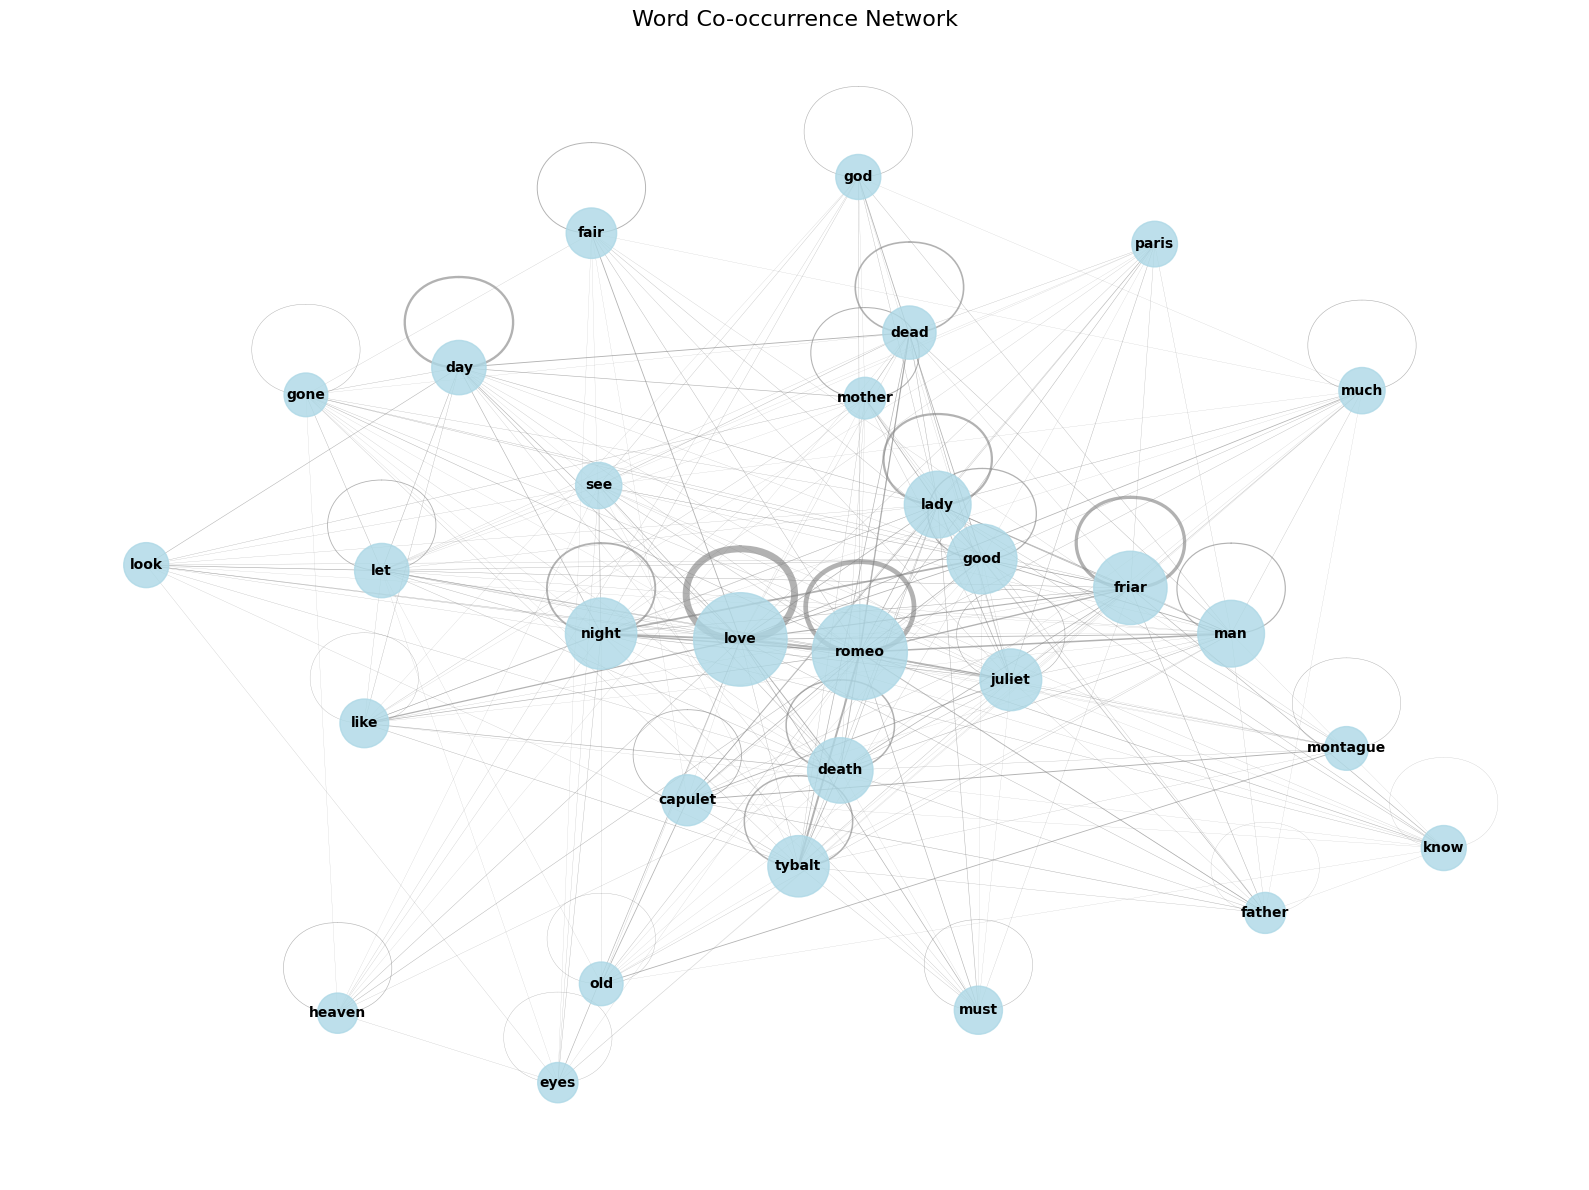

Network Statistics:
  Total nodes: 505
  Total edges: 2791
  Average degree: 11.05


In [446]:
# Visualize the network
G = nx.Graph()

# Add edges based on co-occurrence
for word1, neighbors in co_occurrence.items():
    for word2, weight in neighbors.items():
        if weight > 2:  # Only strong connections
            G.add_edge(word1, word2, weight=weight)

# Get the most connected nodes
node_degrees = dict(G.degree())
top_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)[:30]
top_node_names = [node[0] for node in top_nodes]

# Create subgraph with top nodes
G_sub = G.subgraph(top_node_names)

# Visualize
plt.figure(figsize=(16, 12))

# Layout
pos = nx.spring_layout(G_sub, k=3, iterations=50)

# Draw edges
edges = G_sub.edges()
if edges:
    edge_weights = [G_sub[u][v]['weight'] for u, v in edges]
    max_weight = max(edge_weights) if edge_weights else 1
    
    nx.draw_networkx_edges(G_sub, pos, alpha=0.6, 
                          width=[w/max_weight*5 for w in edge_weights],
                          edge_color='gray')

# Draw nodes
node_sizes = [word_freq[node] * 30 for node in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_size=node_sizes, 
                      node_color='lightblue', alpha=0.8)

# Draw labels
nx.draw_networkx_labels(G_sub, pos, font_size=10, font_weight='bold')

plt.title('Word Co-occurrence Network', size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print network statistics
print(f"Network Statistics:")
print(f"  Total nodes: {G.number_of_nodes()}")
print(f"  Total edges: {G.number_of_edges()}")
if G.number_of_nodes() > 0:
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    print(f"  Average degree: {avg_degree:.2f}")